# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [29]:
# Set the API base URL
base_url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date       
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | olyokminsk
Processing Record 3 of Set 1 | vadso
Processing Record 4 of Set 1 | georgetown
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | raigarh
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | moranbah
Processing Record 9 of Set 1 | kayangel
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | weno
Processing Record 15 of Set 1 | bereznik
Processing Record 16 of Set 1 | utrik
Processing Record 17 of Set 1 | klyuchi
Processing Record 18 of Set 1 | mikuni
Processing Record 19 of Set 1 | tamanrasset
Processing Record 20 of Set 1 | bilibino
Processing Record 21 of Set 1 | tra vinh
Processing Record 22 of Set 1 | tame
Processing Record 23 of Set 1 

Processing Record 35 of Set 4 | kwang binh
Processing Record 36 of Set 4 | alofi
Processing Record 37 of Set 4 | niamey
Processing Record 38 of Set 4 | izazi
Processing Record 39 of Set 4 | eyl
Processing Record 40 of Set 4 | nantucket
Processing Record 41 of Set 4 | avanigadda
Processing Record 42 of Set 4 | jamestown
Processing Record 43 of Set 4 | severo-yeniseyskiy
Processing Record 44 of Set 4 | tapolca
Processing Record 45 of Set 4 | khomeyni shahr
Processing Record 46 of Set 4 | mammoth lakes
Processing Record 47 of Set 4 | udachny
Processing Record 48 of Set 4 | hermanus
Processing Record 49 of Set 4 | ujae
Processing Record 0 of Set 5 | de aar
Processing Record 1 of Set 5 | magadan
Processing Record 2 of Set 5 | pantai cenang
City not found. Skipping...
Processing Record 3 of Set 5 | malango
Processing Record 4 of Set 5 | santyoku
Processing Record 5 of Set 5 | saratamata
City not found. Skipping...
Processing Record 6 of Set 5 | butajira
Processing Record 7 of Set 5 | yoichi


Processing Record 27 of Set 8 | dubbo
Processing Record 28 of Set 8 | valenca do piaui
Processing Record 29 of Set 8 | yung shue wan
Processing Record 30 of Set 8 | urangan
Processing Record 31 of Set 8 | chilpancingo
Processing Record 32 of Set 8 | mariinsk
Processing Record 33 of Set 8 | riviere-du-loup
Processing Record 34 of Set 8 | chake chake
Processing Record 35 of Set 8 | taltal
Processing Record 36 of Set 8 | kill devil hills
Processing Record 37 of Set 8 | shangri-la
City not found. Skipping...
Processing Record 38 of Set 8 | khuzdar
Processing Record 39 of Set 8 | cill airne
Processing Record 40 of Set 8 | yorkton
Processing Record 41 of Set 8 | hot springs national park
City not found. Skipping...
Processing Record 42 of Set 8 | kapuskasing
Processing Record 43 of Set 8 | zeya
Processing Record 44 of Set 8 | pollock pines
Processing Record 45 of Set 8 | tshabong
Processing Record 46 of Set 8 | orcopampa
Processing Record 47 of Set 8 | ceerigaabo
Processing Record 48 of Set 

Processing Record 16 of Set 12 | auki
Processing Record 17 of Set 12 | mont-dore
Processing Record 18 of Set 12 | sur
Processing Record 19 of Set 12 | vangaindrano
Processing Record 20 of Set 12 | namdrik
Processing Record 21 of Set 12 | itapirapua
Processing Record 22 of Set 12 | zhangatas
Processing Record 23 of Set 12 | south hedland
Processing Record 24 of Set 12 | keelakarai
Processing Record 25 of Set 12 | fort mcmurray
Processing Record 26 of Set 12 | bismarck
Processing Record 27 of Set 12 | tanumah
Processing Record 28 of Set 12 | pemangkat
Processing Record 29 of Set 12 | la sarre
Processing Record 30 of Set 12 | byron bay
Processing Record 31 of Set 12 | markovo
Processing Record 32 of Set 12 | manismata
Processing Record 33 of Set 12 | sovetskaya gavan'
Processing Record 34 of Set 12 | porbandar
Processing Record 35 of Set 12 | umm kaddadah
Processing Record 36 of Set 12 | korla
Processing Record 37 of Set 12 | dickinson
-----------------------------
Data Retrieval Complete

In [30]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [31]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,280.97,68,100,4.15,CL,1695742088
1,olyokminsk,60.3736,120.4264,281.46,92,30,0.58,RU,1695742639
2,vadso,70.0744,29.7487,282.64,87,100,3.09,NO,1695742639
3,georgetown,5.4112,100.3354,300.38,89,20,2.24,MY,1695742639
4,port-aux-francais,-49.3500,70.2167,275.27,79,63,16.03,TF,1695742640


In [33]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [34]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,280.97,68,100,4.15,CL,1695742088
1,olyokminsk,60.3736,120.4264,281.46,92,30,0.58,RU,1695742639
2,vadso,70.0744,29.7487,282.64,87,100,3.09,NO,1695742639
3,georgetown,5.4112,100.3354,300.38,89,20,2.24,MY,1695742639
4,port-aux-francais,-49.3500,70.2167,275.27,79,63,16.03,TF,1695742640


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

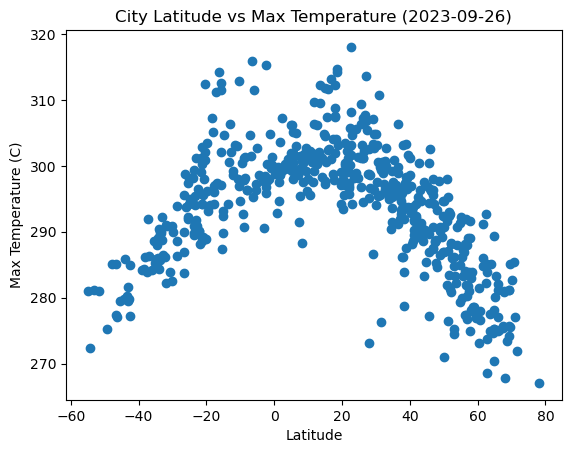

In [37]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature (2023-09-26)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

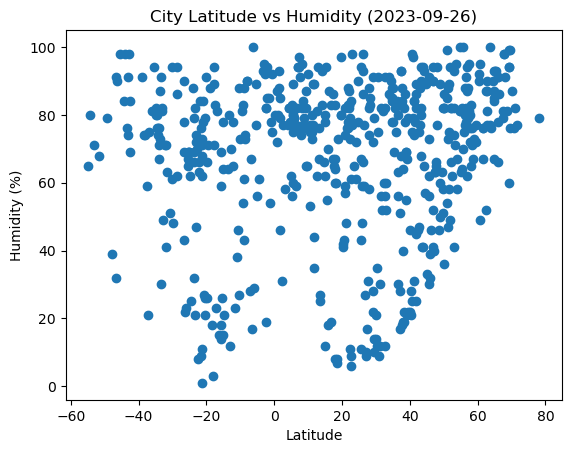

In [38]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (2023-09-26)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

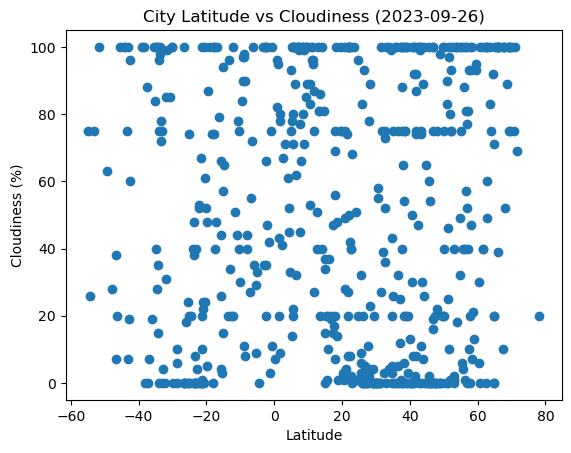

In [39]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (2023-09-26)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

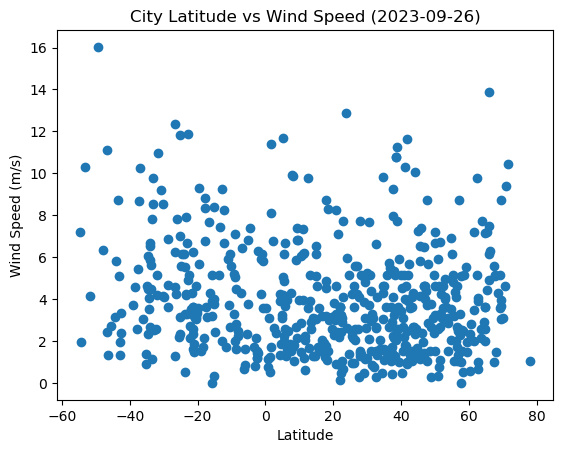

In [40]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (2023-09-26)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [46]:
# Define a function to create Linear Regression plots
# basic formula as follows: 
    #(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
    #regress_values = x_axis * slope + intercept
    #plt.scatter(x_axis, y_axis)
    #plt.plot(x_axis, regress_values, color="red")

In [44]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,olyokminsk,60.3736,120.4264,281.46,92,30,0.58,RU,1695742639
2,vadso,70.0744,29.7487,282.64,87,100,3.09,NO,1695742639
3,georgetown,5.4112,100.3354,300.38,89,20,2.24,MY,1695742639
5,raigarh,21.9000,83.4000,299.25,83,27,0.14,IN,1695742640
8,kayangel,8.0823,134.7173,300.75,82,100,9.85,PW,1695742641


In [45]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,280.97,68,100,4.15,CL,1695742088
4,port-aux-francais,-49.3500,70.2167,275.27,79,63,16.03,TF,1695742640
6,puerto ayora,-0.7393,-90.3518,300.13,92,100,3.58,EC,1695742640
7,moranbah,-22.0016,148.0466,288.13,84,0,3.53,AU,1695742640
9,punta arenas,-53.1500,-70.9167,281.21,71,75,10.29,CL,1695742641


###  Temperature vs. Latitude Linear Regression Plot

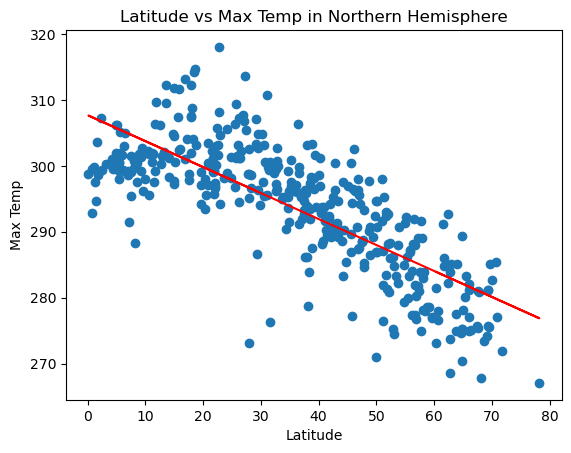

The r-value is: -0.7798105382383856


<Figure size 640x480 with 0 Axes>

In [60]:
# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.plot(northern_hemi_df["Lat"], regress_values, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs Max Temp in Northern Hemisphere")
plt.show()
print(f"The r-value is: {rvalue}")

#Save the figure
plt.savefig("output_data/Fig5-Northern-Temp.png")

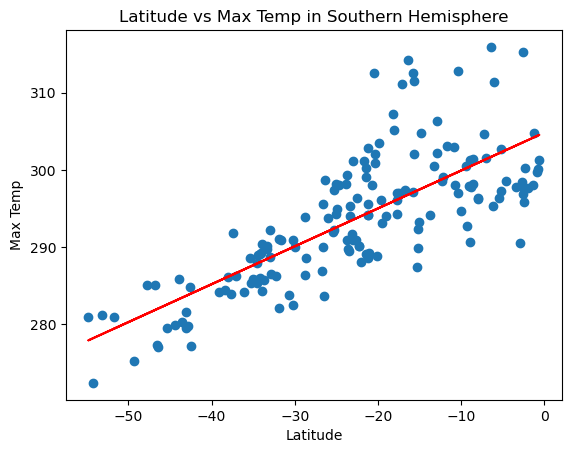

The r-value is: 0.7616770655129981


<Figure size 640x480 with 0 Axes>

In [50]:
# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
plt.plot(southern_hemi_df["Lat"], regress_values, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs Max Temp in Southern Hemisphere")
plt.show()
print(f"The r-value is: {rvalue}")

#Save the figure
plt.savefig("output_data/Fig6-Southern-Temp.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

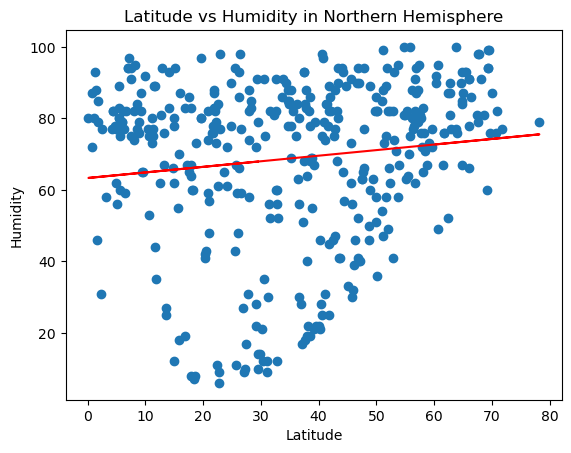

The r-value is: 0.12941311270569494


<Figure size 640x480 with 0 Axes>

In [54]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
plt.plot(northern_hemi_df["Lat"], regress_values, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity in Northern Hemisphere")
plt.show()
print(f"The r-value is: {rvalue}")

#Save the figure
plt.savefig("output_data/Fig7-Northern-Humidity.png")

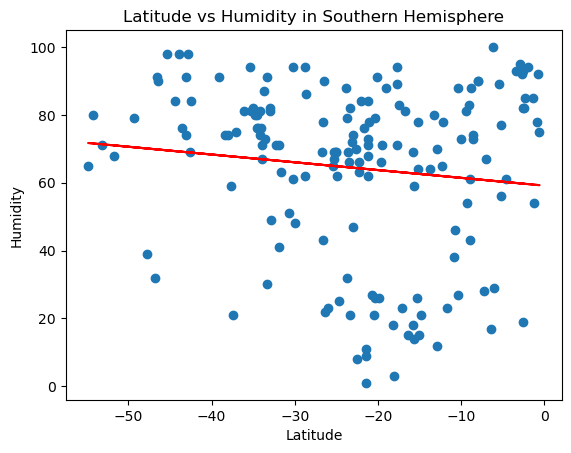

The r-value is: -0.11941745299590367


<Figure size 640x480 with 0 Axes>

In [55]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
plt.plot(southern_hemi_df["Lat"], regress_values, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity in Southern Hemisphere")
plt.show()
print(f"The r-value is: {rvalue}")

#Save the figure
plt.savefig("output_data/Fig8-Southern-Humidity.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

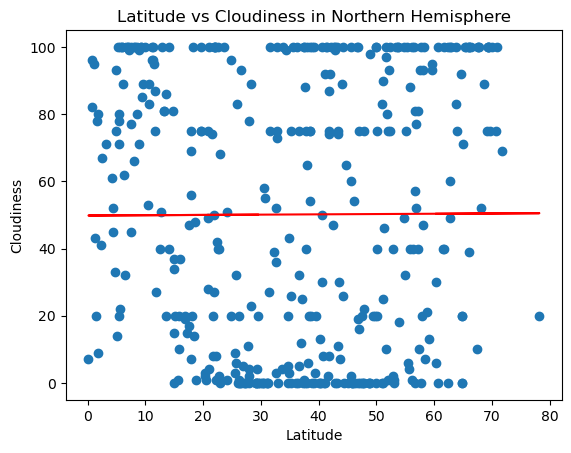

The r-value is: 0.00423857529742233


<Figure size 640x480 with 0 Axes>

In [56]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
plt.plot(northern_hemi_df["Lat"], regress_values, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness in Northern Hemisphere")
plt.show()
print(f"The r-value is: {rvalue}")

#Save the figure
plt.savefig("output_data/Fig9-Northern-Cloudiness.png")

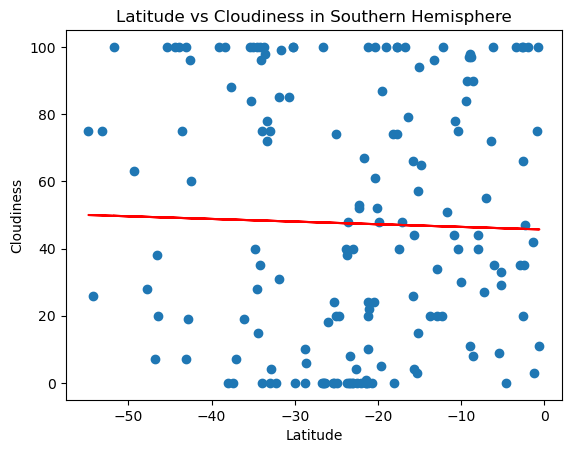

The r-value is: -0.027531368180302197


<Figure size 640x480 with 0 Axes>

In [57]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
plt.plot(southern_hemi_df["Lat"], regress_values, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness in Southern Hemisphere")
plt.show()
print(f"The r-value is: {rvalue}")

#Save the figure
plt.savefig("output_data/Fig10-Southern-Cloudiness.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

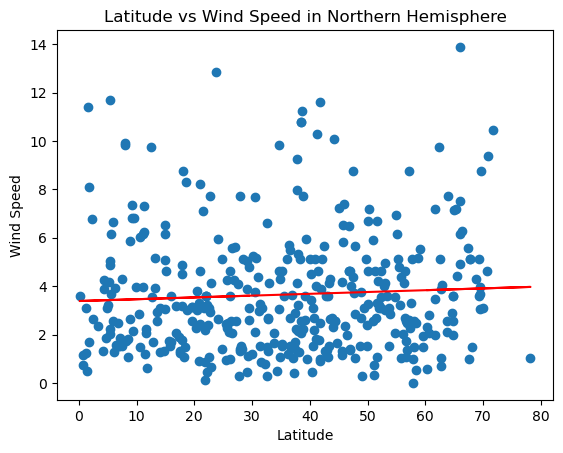

The r-value is: 0.05794075073334173


<Figure size 640x480 with 0 Axes>

In [58]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
plt.plot(northern_hemi_df["Lat"], regress_values, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed in Northern Hemisphere")
plt.show()
print(f"The r-value is: {rvalue}")

#Save the figure
plt.savefig("output_data/Fig11-Northern-WindSpeed.png")

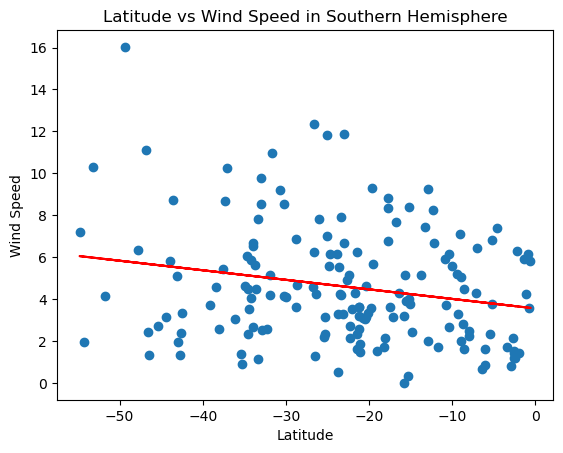

The r-value is: -0.21434740829880042


<Figure size 640x480 with 0 Axes>

In [59]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
plt.plot(southern_hemi_df["Lat"], regress_values, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed in Southern Hemisphere")
plt.show()
print(f"The r-value is: {rvalue}")

#Save the figure
plt.savefig("output_data/Fig12-Southern-WindSpeed.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE